<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
X_train.shape

(8982,)

In [4]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!



8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [5]:
#Converting y data to multi array
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape,y_test.shape

Using TensorFlow backend.


((8982, 46), (2246, 46))

In [6]:
#### Build model
model = Sequential()
model.add(Embedding(max_features,200))
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

W1115 18:02:18.433508 139797932513088 deprecation.py:506] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1115 18:02:18.455321 139797932513088 deprecation.py:506] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# You should only run this cell once your model has been properly configured

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

W1115 18:02:25.081766 139797932513088 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train...
Train on 8982 samples, validate on 2246 samples
8970/8982 [============================>.] - ETA: 0s - loss: 2.2300 - acc: 0.4193

InvalidArgumentError: indices[9,116] = 30979 is not in [0, 30979)
	 [[{{node embedding/embedding_lookup}}]]

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

While training any data, the Keras model expects a standar input size. For RNN which is used for NLP, most of the natural lanuage is in various shape of sentences and words, some sentences might be long and some words might be bigger than others. In such cases it is imperative that we standardise these sentences and words. Padding is used to standardised these inputs. We take the longest word or the sentence in the given input and then transform the other inputs with having the same number of word length or sentence length. All that extra words length or sentence length is filled with empty spaces. This process is called padding.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Recurrent Neural Networks sometime have the disadvantage of vanishing or exploding values in the memory cells due to which sometimes training over the RNN might result in less accuracy, LSTM overcomes this advantages by having forget and remember gate which try to minimise such errors.



## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

RNN are used when simple text processing is done such as classfication of topics
LSTM are used when trying to create a more dense outputs such as predicting the next sequences of sentences or the translations of lanuage from one language to another

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [1]:
!pip install google_images_download

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: https://image.shutterstock.com/image-photo/green-frogs-pond-lilly-pads-260nw-50197960.jpg
Completed Image ====> 1.green-frogs-pond-lilly-pads-260nw-50197960.jpg
Image URL: https://thumbs.dreamstime.com/z/smiling-frog-lily-pad-pond-993691.jpg
Completed Image ====> 2.smiling-frog-lily-pad-pond-993691.jpg
Image URL: https://img-aws.ehowcdn.com/350x235p/photos.demandstudios.com/getty/article/110/213/78036715_XS.jpg
Completed Image ====> 3.78036715_XS.jpg
Image URL: https://i.pinimg.com/originals/b8/16/5b/b8165b6914cd2b65d8a0effd619c7c33.jpg
Completed Image ====> 4.b8165b6914cd2b65d8a0effd619c7c33.jpg
Image URL: https://previews.123rf.com/images/lffile/lffile0909/lffile090900006/5570627-small-frog-on-a-lily-pad-in-a-pond-with-a-blooming-pink-lily-.jpg
Completed Image ====> 5.5570627-small-frog-on-a-lily-pad-in-a-pond-with-a-blooming-pink-lily-.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [56]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=5)[0]
    print(results)
    for entry in results:
        if 'frog' in ent[1]:
            return True
        else:
            return False
            
    

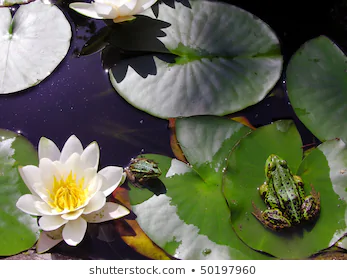

In [27]:
from IPython.display import Image
Image(filename='./downloads/lilly frog pond/1.green-frogs-pond-lilly-pads-260nw-50197960.jpg', width=600)

In [37]:
import os
path = 'downloads/lilly frog pond'
files = os.listdir(path)

In [61]:
for file in files:
    if (file[-3:]=='jpg'):
        filepath = path+'/'+file
        if (img_contains_frog(process_img_path(filepath))):
            print(f'{file} contains Frog in the image')

OSError: cannot identify image file 'downloads/lilly frog pond/1.green-frogs-pond-lilly-pads-260nw-50197960.jpg'

In [28]:
process_img_path('./downloads/lilly frog pond/1.green-frogs-pond-lilly-pads-260nw-50197960.jpg')

OSError: cannot identify image file './downloads/lilly frog pond/1.green-frogs-pond-lilly-pads-260nw-50197960.jpg'

In [30]:
img_contains_frog(process_img_path('./downloads/lilly frog pond/1.green-frogs-pond-lilly-pads-260nw-50197960.jpg'))

OSError: cannot identify image file './downloads/lilly frog pond/1.green-frogs-pond-lilly-pads-260nw-50197960.jpg'

In [40]:
entry = [('n07753592', 'bull frog', 0.06412259),('n03532672', 'hook', 0.06004637), ('n03498962', 'hatchet', 0.058439817)]

In [63]:
for ent in entry:
    if 'frog' in ent[1]:
        print('image contains frog')
    else:
        print('image does not contain frog')

image contains frog
image does not contain frog
image does not contain frog


In [50]:
load_img('./downloads/lilly frog pond/1.green-frogs-pond-lilly-pads-260nw-50197960.jpg')

OSError: cannot identify image file './downloads/lilly frog pond/1.green-frogs-pond-lilly-pads-260nw-50197960.jpg'

In [11]:
!pwd

/home/ec2-user/SageMaker/DS-Unit-4-Sprint-3-Deep-Learning


#### Stretch Goal: Displaying Predictions

In [ ]:
import matplotlib.pyplot as plt



<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

Autoencoder can be used to remove noise from the inputs. For example if an image contains noise, we can use autoencoders to remove the noise and restore it with the required image.

Autoencoders can also be used for similarity testing such that if we want to see a particular face from a series of images, we can use the original image to encode into a lower dimension vector. and then use the lower dimension vector to compare against the lower dimension vectors of the faces given to us.


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

As a Data Scientist, my strongest area is Data Analysis

- What area of Data Science would you most like to learn more about, and why?

I would like to know more about Unsupervised learning, as I believe that the future for Artifical Intelligence lies in the area of Unsupervised learning.

- Where do you think Data Science will be in 5 years?

Data Science will continue to evolve both in terms of more efficient algorithms and also evolve in the area of research in the Artificial Intelligence

- What are the threats posed by AI to our society?

AI can continue to explode on the bias which has been implemented in the socient, as AI learns from past data, our past data is filled with discriminatory bias and the AI will learn the same and continue to perpetuate the bias.
- How do you think we can counteract those threats? 

We can conteract these kind of threats by continue to monitor the bias and to input changes in to the AI system such that the bias over the time minimised in the system.

- Do you think achieving General Artifical Intelligence is ever possible?

Yes, General AI is possible, only because we as humans have known about it and we are trying to achieve it, historically, whenever science or science fiction talks about a pehenomenon it is eventually realised as awareness is the first step to achievement.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")